# Abstract about the report:

## Datasets:
**Our dataset consists of two CSV files containing features relating to A SORT OF PICTURES.**

## Mission:
**Our job is to detect the original pictures from template ones by using these 6 algorithms.**

## Type of algorithms used in this report:
**In this report, we implement 4 machine learning algorithms which are:**
**1. Logistic Regression,
2. NB,
3. Decision Tree,
4. SVM,
5. ANN,
6. MLP**

## Results:
**The results show that Deep Learning models outperform Machine Learning models significantly when it comes to image authenticity classification. In fact, the highest score obtained from MLP and ANN was 97.97% and 97.10% respectively, whereas Machine Learning models showed different performance, with some scoring 97% like Logistic Regression, and others scoring a disappointing score like Naive Bayes, which scored 69%. In contrast, Machine Learning models were faster than Deep Learning models when it comes to implementation (training and testing).**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We use this library to avoid Warning Messages.
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)

In [4]:
#loading the datasets
fa_data = pd.read_csv("FAlwtHH_CLAHEglcm_markov_c1.csv")
ft_data = pd.read_csv("FTlwtHH_CLAHEglcm_markov_c1.csv")

In [5]:
fa_data.shape

(800, 342)

In [6]:
ft_data.shape

(921, 342)

In [4]:
#creating new column "y" for each dataset, and setting this new column values into :
fa_data["y"] = 1
ft_data["y"] = 0

In [5]:
#combianing the two datasets using pandas library concatenation function
combian_dataset = pd.concat([fa_data, ft_data], ignore_index=True)

In [6]:
#Spliting our datasets into:
# x => independent variables
# y => target variables
x = combian_dataset.drop("y", axis=1)
y = combian_dataset["y"]

## Let's perform some EDA "Exploratory Data Analysis" on our data

In [8]:
#Let's see how many raws and columns our dataset has:
combian_dataset.shape

(1721, 343)

In [108]:
#Now let's see the first 5 raws with it columns
combian_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,y
0,0.401606,0.054005,0.033256,0.128455,0.389262,0.010574,0.817375,0.021188,69.389601,199.750000,...,0.037500,0.015705,0.500000,0.233290,0.106203,0.055802,0.083844,0.072222,0.064744,1
1,0.685519,0.113890,-0.059541,0.175082,0.261512,0.002756,0.744370,0.030112,153.103783,404.083333,...,0.075000,0.018758,0.535486,0.321178,0.226691,0.162646,0.186910,0.131250,0.108234,1
2,0.797298,0.145251,-0.096413,0.199051,0.293886,0.005445,0.758933,0.014777,41.403502,64.750000,...,0.051056,0.012530,0.528823,0.284839,0.207869,0.159301,0.165601,0.123239,0.099548,1
3,0.306081,0.049677,-0.083152,0.175691,0.608326,0.014446,0.887808,0.001966,7.632169,17.416667,...,0.065076,0.022519,0.520660,0.292571,0.196310,0.110498,0.145921,0.118221,0.090474,1
4,0.370582,0.062928,0.071387,0.156084,0.478758,0.009660,0.857109,0.014574,124.732120,248.750000,...,0.045455,0.026435,0.495586,0.169492,0.075691,0.015684,0.047100,0.046717,0.072856,1


In [81]:
#This time lets see the 5 last raws with its columns
combian_dataset.tail()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,y
1716,0.599108,0.121623,-0.035442,0.209696,0.447878,0.006925,0.834655,0.015079,752.499662,4814.833333,...,0.053613,0.020698,0.501478,0.240686,0.127306,0.054655,0.093504,0.090909,0.076460,0
1717,1.052912,0.244536,-0.080315,0.250870,0.307433,0.006607,0.769464,0.022140,700.345761,1688.833333,...,0.053454,0.018410,0.518986,0.266122,0.114567,0.054927,0.095857,0.095395,0.073789,0
1718,0.203650,0.039004,-0.053388,0.200429,0.740387,0.006497,0.931584,0.005750,534.008912,2790.500000,...,0.055783,0.021499,0.513844,0.253498,0.131316,0.051815,0.099613,0.099262,0.090027,0
1719,0.343529,0.061852,0.005343,0.178012,0.527092,0.009171,0.868419,0.013931,664.360253,2940.083333,...,0.053733,0.025210,0.513828,0.232450,0.136864,0.051821,0.104239,0.093510,0.082854,0
1720,0.205086,0.039597,-0.068795,0.205747,0.756187,0.006384,0.934837,0.001724,464.005059,4341.583333,...,0.042522,0.021861,0.515116,0.220516,0.125319,0.053429,0.103679,0.103372,0.102511,0


In [82]:
#Now lets apply some statistical explorations on our dataset
combian_dataset.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
0,1721.0,0.339984,0.202990,0.012268,0.199276,0.330181,0.436199,3.483241
1,1721.0,0.058380,0.044686,0.002005,0.030163,0.050543,0.072337,0.739426
2,1721.0,0.006612,0.062737,-0.139501,-0.043310,0.013686,0.058833,0.200777
3,1721.0,0.162323,0.035435,0.067650,0.136777,0.156597,0.182581,0.391713
4,1721.0,0.569118,0.184241,0.172741,0.417724,0.524307,0.727879,0.987470
...,...,...,...,...,...,...,...,...
338,1721.0,0.057322,0.021424,0.009507,0.043301,0.056238,0.066832,0.267067
339,1721.0,0.104126,0.032972,0.021057,0.080033,0.102706,0.124046,0.252510
340,1721.0,0.110728,0.028179,0.022654,0.091667,0.108666,0.128191,0.233333
341,1721.0,0.096776,0.025378,0.044809,0.079890,0.091804,0.109205,0.219283


In [83]:
#Let's look at general info about our dataset
combian_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Columns: 343 entries, 0 to y
dtypes: float64(342), int64(1)
memory usage: 4.5 MB


In [84]:
#let's check if there is any missing values in our dataset
combian_dataset.isnull()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1718,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1719,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
combian_dataset.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
338    0
339    0
340    0
341    0
y      0
Length: 343, dtype: int64

In [86]:
#Counting how many classes it consists of:
combian_dataset["y"].value_counts()

0    921
1    800
Name: y, dtype: int64

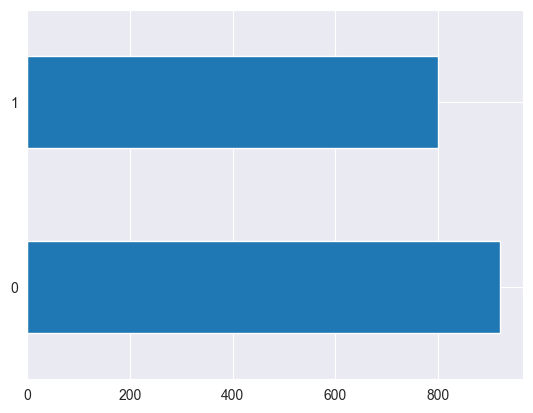

In [87]:
# Let's do some visualization for our dataset
combian_dataset["y"].value_counts().plot.barh();

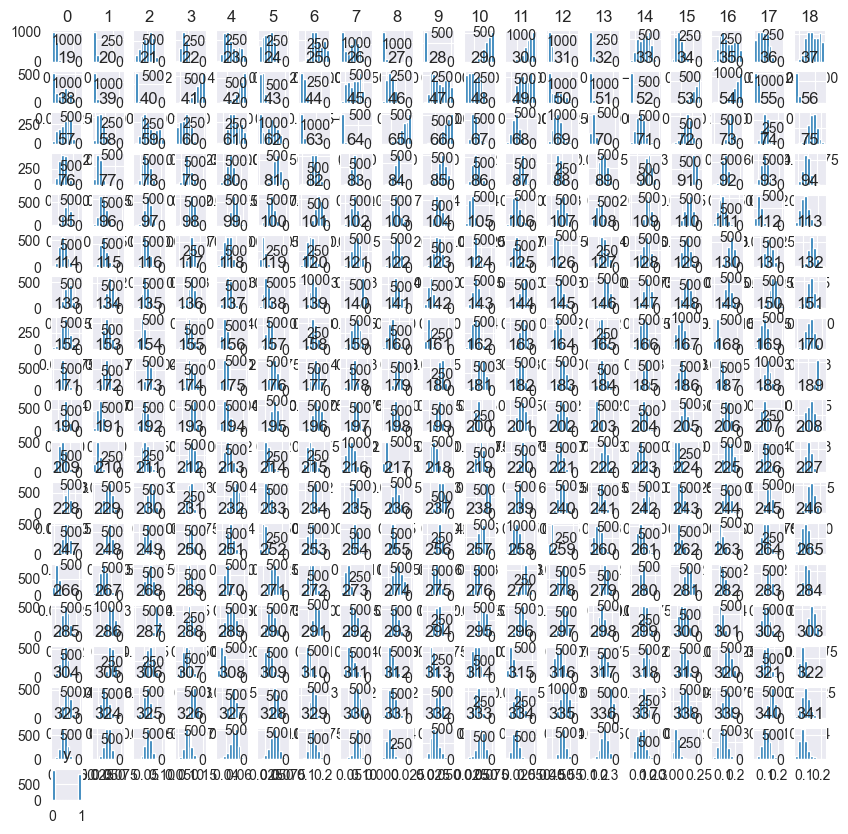

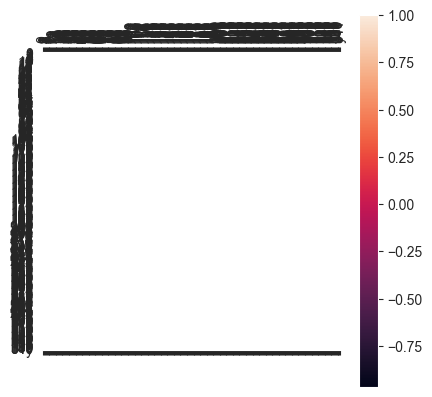

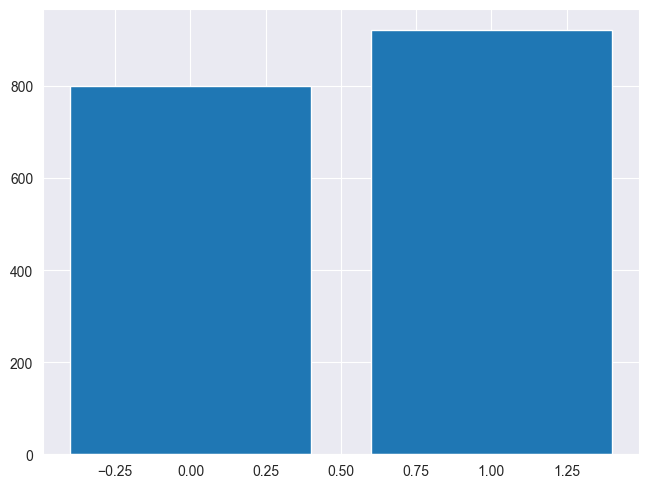

In [88]:
# Let's visualize the distribution of each variable
combian_dataset.hist(figsize=(10,10))
plt.show()

# Checking for correlations between variables
plt.matshow(combian_dataset.corr())
plt.xticks(range(combian_dataset.shape[1]), combian_dataset.columns, rotation=90)
plt.yticks(range(combian_dataset.shape[1]), combian_dataset.columns)
plt.colorbar()
plt.show()

# Explore any categorical variables
plt.bar(combian_dataset['y'].unique(), combian_dataset['y'].value_counts())
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

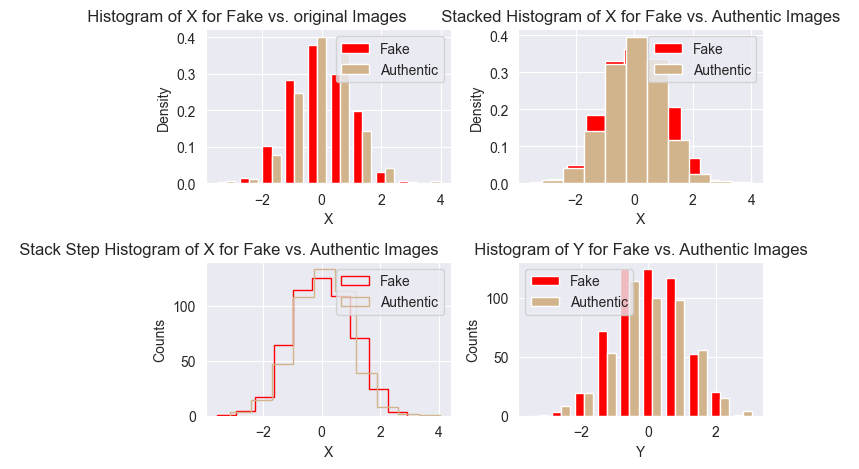

In [13]:
#Creating a histogram graph for authentic and fake images in
np.random.seed(19680801)

n_bins = 10

x = np.random.randn(1000, 2)
y = np.random.randint(2, size=1000)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan']
labels = ['Fake', 'Authentic']
class_indices = [y == 0, y == 1]

ax0.hist([x[class_indices[0], 0], x[class_indices[1], 0]], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 10})
ax0.set_title('  Histogram of X for Fake vs. original Images                                     ')
ax0.set_xlabel('X')
ax0.set_ylabel('Density')

ax1.hist(x[class_indices[0], 0], n_bins, density=True, histtype='bar', stacked=True, color=colors[0], label=labels[0])
ax1.hist(x[class_indices[1], 0], n_bins, density=True, histtype='bar', stacked=True, color=colors[1], label=labels[1])
ax1.set_title('  Stacked Histogram of X for Fake vs. Authentic Images  ')
ax1.set_xlabel('X')
ax1.set_ylabel('Density')
ax1.legend(prop={'size': 10})

ax2.hist(x[class_indices[0], 0], n_bins, histtype='step', stacked=True, fill=False, color=colors[0], label=labels[0])
ax2.hist(x[class_indices[1], 0], n_bins, histtype='step', stacked=True, fill=False, color=colors[1], label=labels[1])
ax2.set_title('  Stack Step Histogram of X for Fake vs. Authentic Images                                             ')
ax2.set_xlabel('X')
ax2.set_ylabel('Counts')
ax2.legend(prop={'size': 10})

x_multi = [x[y == i, 1] for i in range(2)]
ax3.hist(x_multi, n_bins, histtype='bar', color=colors, label=labels)
ax3.set_title('  Histogram of Y for Fake vs. Authentic Images  ')
ax3.set_xlabel('Y')
ax3.set_ylabel('Counts')
ax3.legend(prop={'size': 10})

fig.tight_layout()
plt.show()


In [9]:
# Let's check the missing values in the dataset.
# Load the combined dataset into a pandas DataFrame
combined_dataset = combian_dataset

# Check for missing values
missing_values = combined_dataset.isnull().sum()
total_samples = combined_dataset.shape[0]

# Calculate the percentage of missing values for each feature
missing_percentage = (missing_values / total_samples) * 100

# Display the missing values information
print("Missing Values:")
print(missing_values)

print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
338    0
339    0
340    0
341    0
y      0
Length: 343, dtype: int64

Missing Values Percentage:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
338    0.0
339    0.0
340    0.0
341    0.0
y      0.0
Length: 343, dtype: float64


In [11]:
# Split the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

test_size = 0.2  # Set the proportion of the dataset to be used for testing
random_state = 42  # Set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)


In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(x)  # Scale the entire dataset for cross-validation


C:\Users\algak\PycharmProjects\Good_luck_with_your_dreams\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9768115942028985
Precision: 0.9818181818181818
Recall: 0.9700598802395209
F1 Score: 0.9759036144578314
ROC AUC Score: 0.9766029738276255
Confusion Matrix:
[[175   3]
 [  5 162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       178
           1       0.98      0.97      0.98       167

    accuracy                           0.98       345
   macro avg       0.98      0.98      0.98       345
weighted avg       0.98      0.98      0.98       345



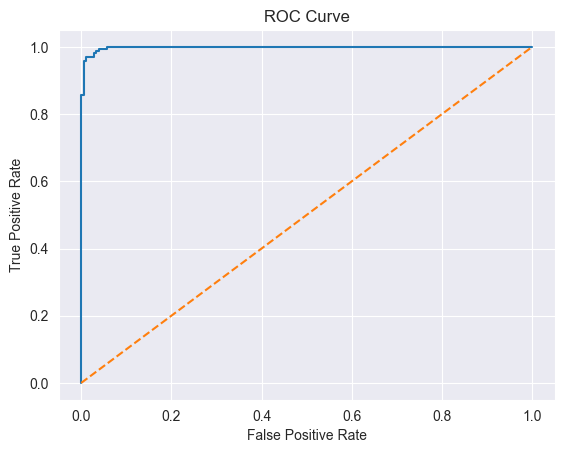

Execution Time: 0.9248740673065186 seconds


In [26]:
#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import time

start_time = time.time()

# Model Creation
model = LogisticRegression()

# Model Training
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy_LR = accuracy_score(y_test, y_pred)
precision_LR = precision_score(y_test, y_pred)
recall_LR = recall_score(y_test, y_pred)
f1_LR = f1_score(y_test, y_pred)
roc_auc_LR = roc_auc_score(y_test, y_pred)
confusion_mat_LR = confusion_matrix(y_test, y_pred)
classification_rep_LR = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_LR)
print("Precision:", precision_LR)
print("Recall:", recall_LR)
print("F1 Score:", f1_LR)
print("ROC AUC Score:", roc_auc_LR)
print("Confusion Matrix:")
print(confusion_mat_LR)
print("Classification Report:")
print(classification_rep_LR)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

end_time = time.time()
execution_time_LR = end_time - start_time
print("Execution Time:", execution_time_LR, "seconds")


Accuracy: 0.6956521739130435
Precision: 0.6504854368932039
Recall: 0.8023952095808383
F1 Score: 0.7184986595174263
ROC AUC Score: 0.6989504137791832
Confusion Matrix:
[[106  72]
 [ 33 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       178
           1       0.65      0.80      0.72       167

    accuracy                           0.70       345
   macro avg       0.71      0.70      0.69       345
weighted avg       0.71      0.70      0.69       345



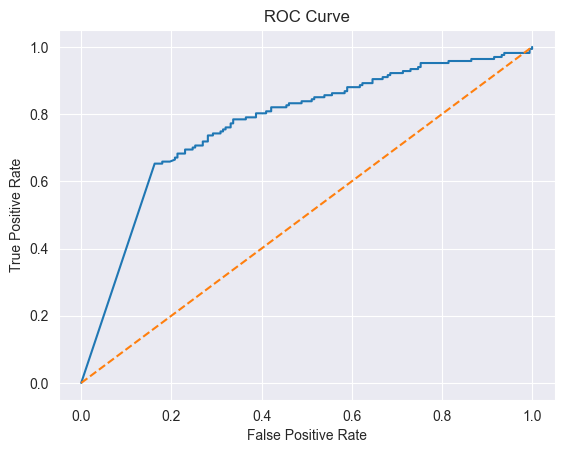

Execution Time: 0.3073720932006836 seconds


In [27]:
#2.Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

start_time = time.time()

# Model Creation
model = GaussianNB()

# Model Training
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy_NB = accuracy_score(y_test, y_pred)
precision_NB = precision_score(y_test, y_pred)
recall_NB = recall_score(y_test, y_pred)
f1_NB = f1_score(y_test, y_pred)
roc_auc_NB = roc_auc_score(y_test, y_pred)
confusion_mat_NB = confusion_matrix(y_test, y_pred)
classification_rep_NB = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_NB)
print("Precision:", precision_NB)
print("Recall:", recall_NB)
print("F1 Score:", f1_NB)
print("ROC AUC Score:", roc_auc_NB)
print("Confusion Matrix:")
print(confusion_mat_NB)
print("Classification Report:")
print(classification_rep_NB)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


end_time = time.time()
execution_time_NB = end_time - start_time
print("Execution Time:", execution_time_NB, "seconds")


Accuracy: 0.8057971014492754
Precision: 0.8048780487804879
Recall: 0.7904191616766467
F1 Score: 0.797583081570997
ROC AUC Score: 0.8053219403888852
Confusion Matrix:
[[146  32]
 [ 35 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       178
           1       0.80      0.79      0.80       167

    accuracy                           0.81       345
   macro avg       0.81      0.81      0.81       345
weighted avg       0.81      0.81      0.81       345



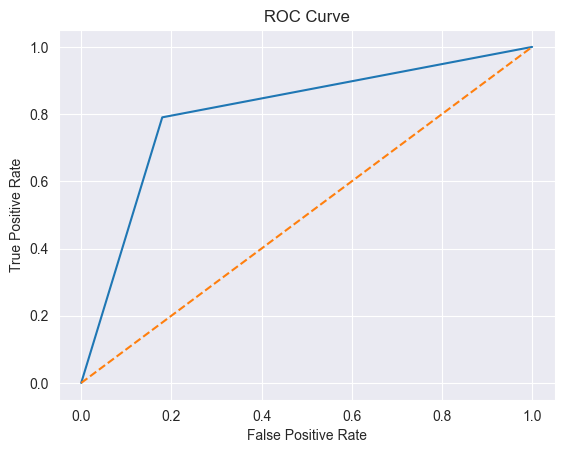

Execution Time: 1.755652904510498 seconds


In [28]:
#3.DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

start_time = time.time()

# Model Creation
model = DecisionTreeClassifier()

# Model Training
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy_DT = accuracy_score(y_test, y_pred)
precision_DT = precision_score(y_test, y_pred)
recall_DT = recall_score(y_test, y_pred)
f1_DT = f1_score(y_test, y_pred)
roc_auc_DT = roc_auc_score(y_test, y_pred)
confusion_mat_DT = confusion_matrix(y_test, y_pred)
classification_rep_DT = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_DT)
print("Precision:", precision_DT)
print("Recall:", recall_DT)
print("F1 Score:", f1_DT)
print("ROC AUC Score:", roc_auc_DT)
print("Confusion Matrix:")
print(confusion_mat_DT)
print("Classification Report:")
print(classification_rep_DT)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


end_time = time.time()
execution_time_DT = end_time - start_time
print("Execution Time:", execution_time_DT, "seconds")


Accuracy: 0.9536231884057971
Precision: 0.9808917197452229
Recall: 0.9221556886227545
F1 Score: 0.9506172839506173
ROC AUC Score: 0.9923635874318778
Confusion Matrix:
[[175   3]
 [ 13 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       178
           1       0.98      0.92      0.95       167

    accuracy                           0.95       345
   macro avg       0.96      0.95      0.95       345
weighted avg       0.96      0.95      0.95       345



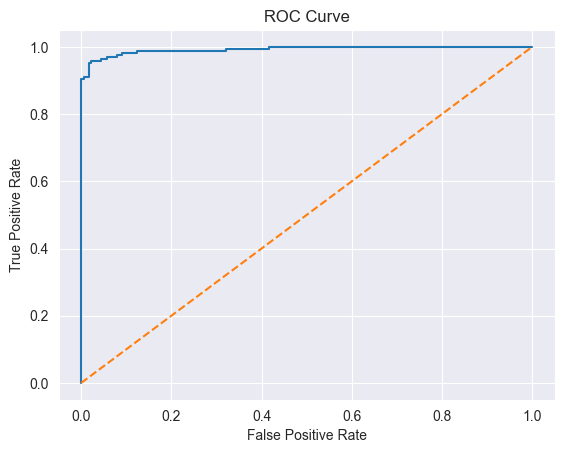

Execution Time: 1.0082752704620361 seconds


In [29]:
#4. SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

start_time = time.time()

# Model Creation
model = SVC()

# Model Training
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.decision_function(X_test_scaled)

accuracy_SVM = accuracy_score(y_test, y_pred)
precision_SVM = precision_score(y_test, y_pred)
recall_SVM = recall_score(y_test, y_pred)
f1_SVM = f1_score(y_test, y_pred)
roc_auc_SVM = roc_auc_score(y_test, y_pred_proba)
confusion_mat_SVM = confusion_matrix(y_test, y_pred)
classification_rep_SVM = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_SVM)
print("Precision:", precision_SVM)
print("Recall:", recall_SVM)
print("F1 Score:", f1_SVM)
print("ROC AUC Score:", roc_auc_SVM)
print("Confusion Matrix:")
print(confusion_mat_SVM)
print("Classification Report:")
print(classification_rep_SVM)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


end_time = time.time()
execution_time_SVM = end_time - start_time
print("Execution Time:", execution_time_SVM, "seconds")


Epoch 1/10
43/43 [==============================] - 2s 11ms/step - loss: 0.4576 - accuracy: 0.7900 - val_loss: 0.3051 - val_accuracy: 0.8870
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9426 - val_loss: 0.1698 - val_accuracy: 0.9449
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9731 - val_loss: 0.1030 - val_accuracy: 0.9449
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0969 - val_accuracy: 0.9594
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9920 - val_loss: 0.0682 - val_accuracy: 0.9681
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9964 - val_loss: 0.0788 - val_accuracy: 0.9594
Epoch 7/10
43/43 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9993 - val_loss: 0.0724 - val_accuracy: 0.9623
Epoch 8/10
43/43 [=

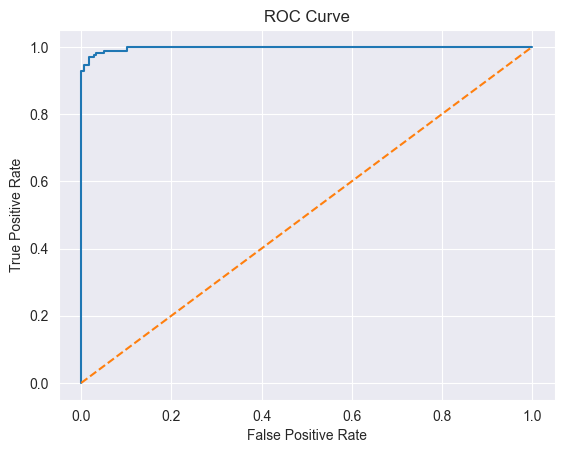

Execution Time: 3.419743776321411 seconds


In [30]:
#5. ANN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

start_time = time.time()

# Model Creation
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Model Evaluation
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy_ANN = accuracy_score(y_test, y_pred)
precision_ANN = precision_score(y_test, y_pred)
recall_ANN = recall_score(y_test, y_pred)
f1_ANN = f1_score(y_test, y_pred)
roc_auc_ANN = roc_auc_score(y_test, y_pred)
confusion_mat_ANN = confusion_matrix(y_test, y_pred)
classification_rep_ANN = classification_report(y_test, y_pred)
#
print("Accuracy:", accuracy_ANN)
print("Precision:", precision_ANN)
print("Recall:", recall_ANN)
print("F1 Score:", f1_ANN)
print("ROC AUC Score:", roc_auc_ANN)
print("Confusion Matrix:")
print(confusion_mat_ANN)
print("Classification Report:")
print(classification_rep_ANN)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


end_time = time.time()
execution_time_ANN = end_time - start_time
print("Execution Time:", execution_time_ANN, "seconds")


Accuracy: 0.9797101449275363
Precision: 0.9878048780487805
Recall: 0.9700598802395209
F1 Score: 0.9788519637462236
ROC AUC Score: 0.9794119625916705
Confusion Matrix:
[[176   2]
 [  5 162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       178
           1       0.99      0.97      0.98       167

    accuracy                           0.98       345
   macro avg       0.98      0.98      0.98       345
weighted avg       0.98      0.98      0.98       345



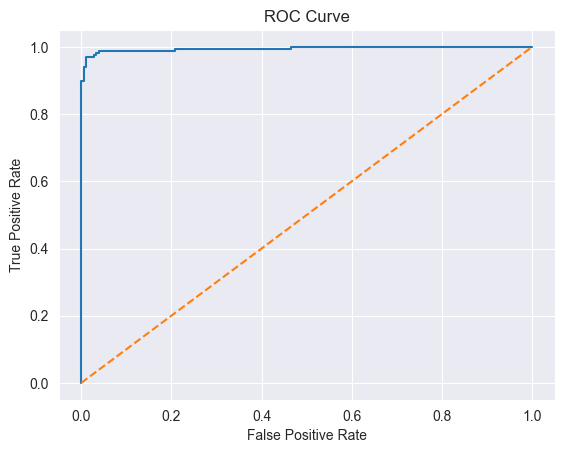

Execution Time: 1.8708076477050781 seconds


In [31]:
#6. MLP
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

start_time = time.time()

# Model Creation
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', random_state=42)

# Model Training
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy_MLP = accuracy_score(y_test, y_pred)
precision_MLP = precision_score(y_test, y_pred)
recall_MLP = recall_score(y_test, y_pred)
f1_MLP = f1_score(y_test, y_pred)
roc_auc_MLP = roc_auc_score(y_test, y_pred)
confusion_mat_MLP = confusion_matrix(y_test, y_pred)
classification_rep_MLP = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_MLP)
print("Precision:", precision_MLP)
print("Recall:", recall_MLP)
print("F1 Score:", f1_MLP)
print("ROC AUC Score:", roc_auc_MLP)
print("Confusion Matrix:")
print(confusion_mat_MLP)
print("Classification Report:")
print(classification_rep_MLP)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


end_time = time.time()
execution_time_MLP = end_time - start_time
print("Execution Time:", execution_time_MLP, "seconds")


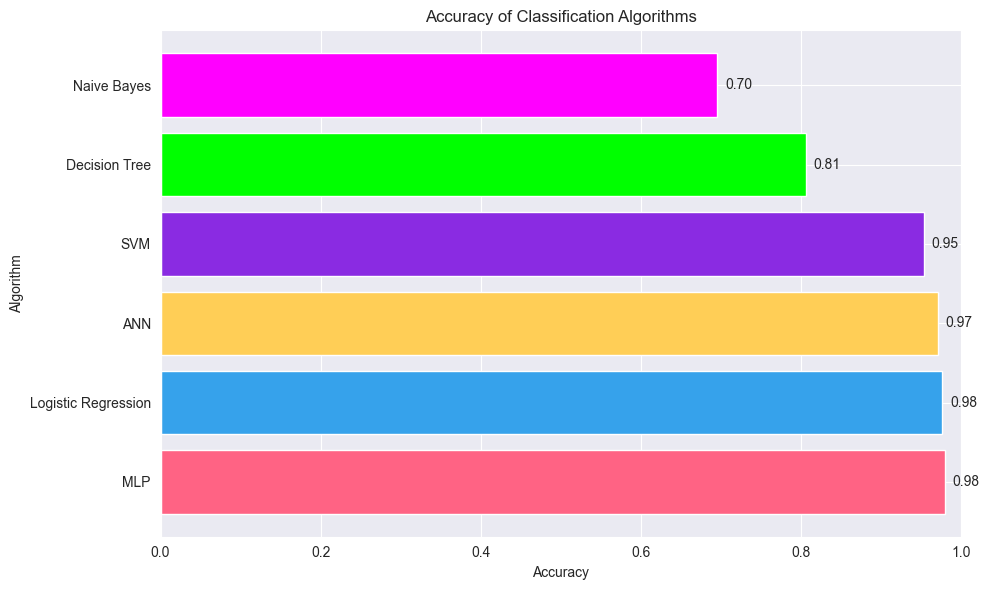

In [32]:
#Comparing all the 6 models:
# Let's create a dictionary for our 6 models names and their corresponding accuracy scores
accuracy_results = {
    'Logistic Regression': accuracy_LR,
    'Decision Tree': accuracy_DT,
    'Naive Bayes': accuracy_NB,
    'SVM': accuracy_SVM,
    'ANN': accuracy_ANN,
    'MLP': accuracy_MLP
}
df = pd.DataFrame(list(accuracy_results.items()), columns=['Algorithm', 'Accuracy'])

df = df.sort_values(by='Accuracy', ascending=False)

colors = ['#FF6384', '#36A2EB', '#FFCE56', '#8A2BE2', '#00FF00', '#FF00FF']

# Plot the accuracy results
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Algorithm'], df['Accuracy'], color=colors)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy of Classification Algorithms')
plt.xlim(0, 1)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


In [34]:
#Now let's compare each algorithm results, from the best to worst
models = pd.DataFrame({
                'Models': ['Logistic Regression',
                           'Decision Tree' ,
                           'Naive Bayes' ,
                           'SVM',
                           'ANN',
                           'MLP' ],

                'Score':  [ accuracy_LR, accuracy_DT, accuracy_NB, accuracy_SVM, accuracy_ANN, accuracy_MLP],

                "time": [execution_time_LR, execution_time_DT, execution_time_NB, execution_time_SVM, execution_time_ANN, execution_time_MLP]})

models.sort_values(by='Score', ascending=True)

,Models,Score,time
2,Naive Bayes,0.695652,0.307372
1,Decision Tree,0.805797,1.755653
3,SVM,0.953623,1.008275
4,ANN,0.971014,3.419744
0,Logistic Regression,0.976812,0.924874
5,MLP,0.979710,1.870808


##As seen in the above table, the fastest model was NB by 0.30 secs and the slowest one was ANN by 3.4 secs